# COVID-19 Data Analysis



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
covid = pd.read_csv('covid_sample.csv', parse_dates=['Date'])
print('Dataset loaded:', covid.shape)

# show head
covid.head()


Dataset loaded: (4500, 10)


,Country,Date,NewCases,NewDeaths,NewRecovered,TotalConfirmed,TotalDeaths,TotalRecovered,Tests,Population
0,India,2020-01-01,68225,661,54777,68225,661,54777,955150,311957822
1,India,2020-01-02,72249,703,58367,140474,1364,113144,433494,311957822
2,India,2020-01-03,68193,691,55499,208667,2055,168643,613737,311957822
3,India,2020-01-04,65292,618,56679,273959,2673,225322,652920,311957822
4,India,2020-01-05,51566,502,47979,325525,3175,273301,567226,311957822


In [2]:
# Quick checks
print('Missing values:\n', covid.isnull().sum())
print('\nData types:\n', covid.dtypes)
print('\nCountries in dataset:', covid['Country'].unique())


Missing values:
 Country           0
Date              0
NewCases          0
NewDeaths         0
NewRecovered      0
TotalConfirmed    0
TotalDeaths       0
TotalRecovered    0
Tests             0
Population        0
dtype: int64

Data types:
 Country                   object
Date              datetime64[ns]
NewCases                   int64
NewDeaths                  int64
NewRecovered               int64
TotalConfirmed             int64
TotalDeaths                int64
TotalRecovered             int64
Tests                      int64
Population                 int64
dtype: object

Countries in dataset: ['India' 'USA' 'Brazil' 'Germany' 'South Africa']


In [3]:
# Aggregate to daily totals per country (already granular)
# Example: country = 'India'
country = 'India'
ct = covid[covid['Country']==country].copy()
ct = ct.sort_values('Date')
ct = ct.set_index('Date')

# Compute 7-day moving averages
ct['MA_NewCases_7d'] = ct['NewCases'].rolling(7, min_periods=1).mean()
ct['MA_NewDeaths_7d'] = ct['NewDeaths'].rolling(7, min_periods=1).mean()

# Growth rate (daily percent change of TotalConfirmed)
ct['DailyGrowthPct'] = ct['TotalConfirmed'].pct_change().replace([np.inf, -np.inf], np.nan).fillna(0) * 100

ct.head()


,Country,NewCases,NewDeaths,NewRecovered,TotalConfirmed,TotalDeaths,TotalRecovered,Tests,Population,MA_NewCases_7d,MA_NewDeaths_7d,DailyGrowthPct
Date,,,,,,,,,,,,
2020-01-01,India,68225,661,54777,68225,661,54777,955150,311957822,68225.000000,661.00,0.000000
2020-01-02,India,72249,703,58367,140474,1364,113144,433494,311957822,70237.000000,682.00,105.898131
2020-01-03,India,68193,691,55499,208667,2055,168643,613737,311957822,69555.666667,685.00,48.544926
2020-01-04,India,65292,618,56679,273959,2673,225322,652920,311957822,68489.750000,668.25,31.290046
2020-01-05,India,51566,502,47979,325525,3175,273301,567226,311957822,65105.000000,635.00,18.822525


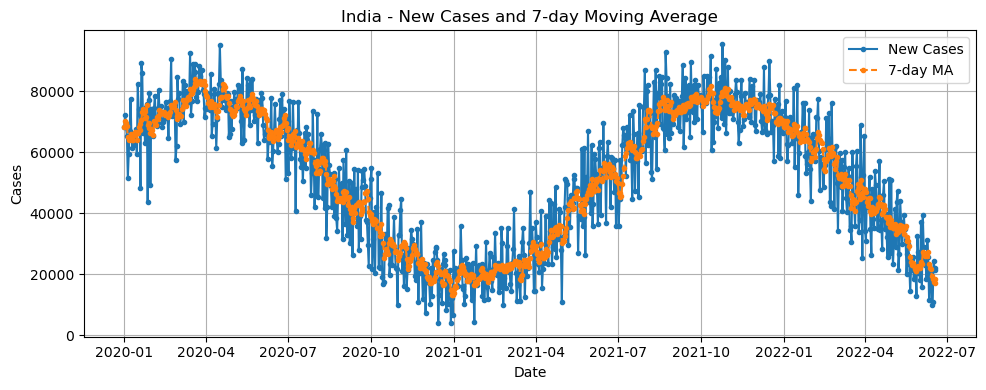

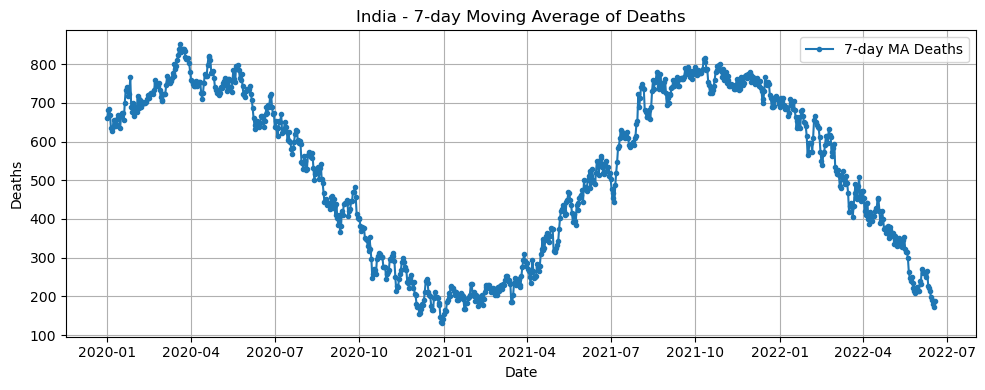

In [4]:
# Plot New Cases and 7-day MA for a country
country = 'India'
ct = covid[covid['Country']==country].sort_values('Date')
ct = ct.set_index('Date')

plt.figure(figsize=(10,4))
plt.plot(ct.index, ct['NewCases'], marker='.', label='New Cases')
plt.plot(ct.index, ct['NewCases'].rolling(7, min_periods=1).mean(), marker='.', linestyle='--', label='7-day MA')
plt.title(country + ' - New Cases and 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(ct.index, ct['NewDeaths'].rolling(7, min_periods=1).mean(), marker='.', label='7-day MA Deaths')
plt.title(country + ' - 7-day Moving Average of Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


        Country  TotalConfirmed  TotalDeaths  Population  CFR_pct  \
2         India        47066915       470048   311957822      1.0   
1       Germany        44402118       443440   292360272      1.0   
0        Brazil        38208770       382948   253306921      1.0   
4           USA        28809222       288106   189512450      1.0   
3  South Africa         5154747        51532    34388642      1.0   

   Cases_per_100k  
2        15087.59  
1        15187.47  
0        15083.98  
4        15201.76  
3        14989.68  


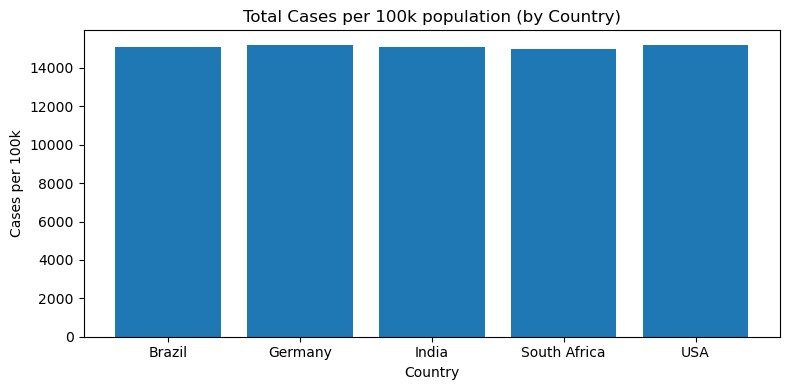

In [5]:
# Compute Case Fatality Rate (CFR) and per-capita metrics for all countries
covid_group = covid.groupby(['Country']).agg({'TotalConfirmed':'max','TotalDeaths':'max','Population':'max'}).reset_index()
covid_group['CFR_pct'] = (covid_group['TotalDeaths'] / covid_group['TotalConfirmed'] * 100).round(2)
covid_group['Cases_per_100k'] = (covid_group['TotalConfirmed'] / covid_group['Population'] * 100000).round(2)

print(covid_group.sort_values('TotalConfirmed', ascending=False))

# Bar plot: Cases per 100k
plt.figure(figsize=(8,4))
plt.bar(covid_group['Country'], covid_group['Cases_per_100k'])
plt.title('Total Cases per 100k population (by Country)')
plt.xlabel('Country')
plt.ylabel('Cases per 100k')
plt.tight_layout()
plt.show()


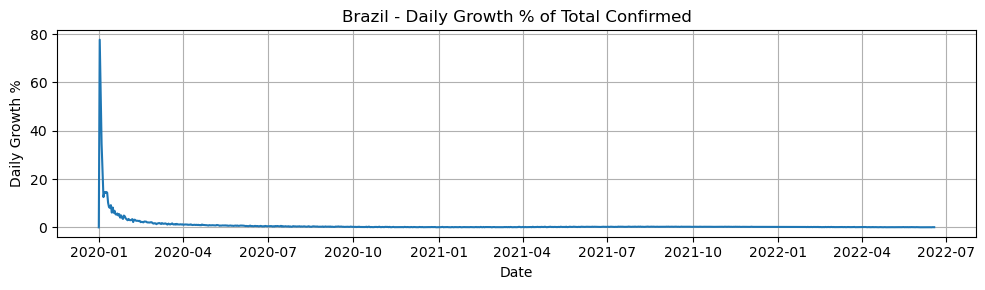

In [6]:
# Visualize daily growth % for a country
country = 'Brazil'
ct = covid[covid['Country']==country].sort_values('Date')
ct = ct.set_index('Date')
ct['DailyGrowthPct'] = ct['TotalConfirmed'].pct_change().replace([np.inf,-np.inf], np.nan).fillna(0) * 100

plt.figure(figsize=(10,3))
plt.plot(ct.index, ct['DailyGrowthPct'])
plt.title(country + ' - Daily Growth % of Total Confirmed')
plt.xlabel('Date')
plt.ylabel('Daily Growth %')
plt.grid(True)
plt.tight_layout()
plt.show()
